In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weather_classification_data[1].csv")

In [5]:
data.shape

(13200, 11)

In [6]:
data.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [8]:
data.describe()


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [9]:
data.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [10]:
data.skew(numeric_only=True)

,0
Temperature,0.221741
Humidity,-0.401614
Wind Speed,1.360263
Precipitation (%),-0.152457
Atmospheric Pressure,-0.293899
UV Index,0.900010
Visibility (km),1.233275


EDA

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

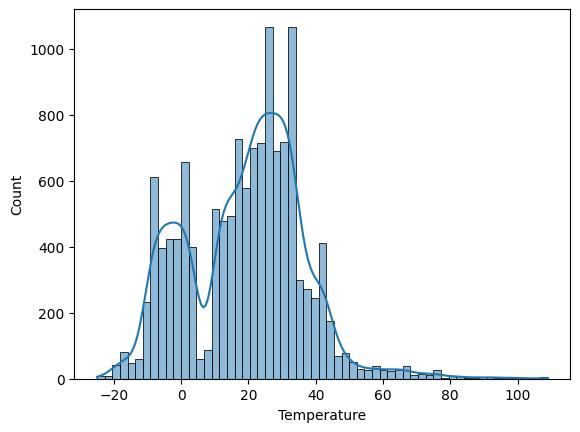

In [12]:
sns.histplot(data=data,x="Temperature",kde=True)
plt.show()

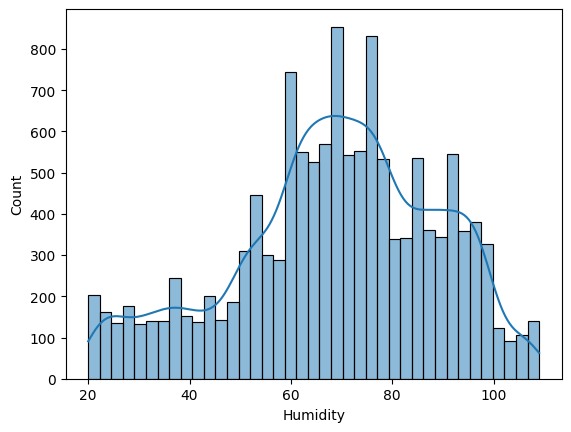

In [13]:
sns.histplot(data=data,x="Humidity",kde=True)
plt.show()

<Axes: xlabel='Weather Type', ylabel='count'>

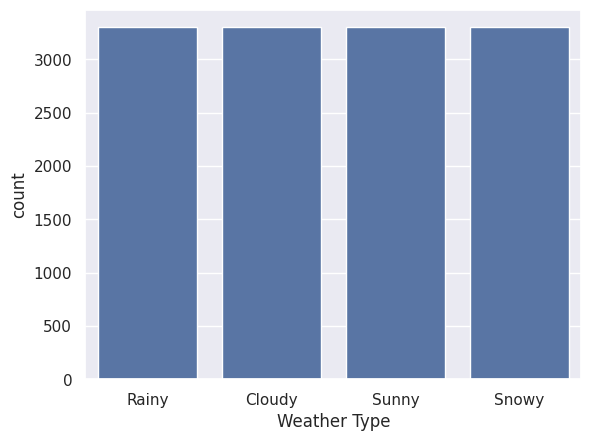

In [14]:
sns.set_theme(style="darkgrid")
sns.countplot(data=data,x="Weather Type")

<Axes: xlabel='Cloud Cover', ylabel='count'>

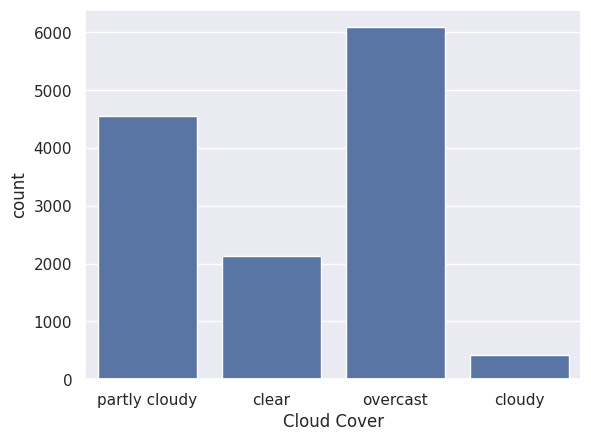

In [15]:
sns.set_theme(style="darkgrid")
sns.countplot(data=data,x="Cloud Cover")

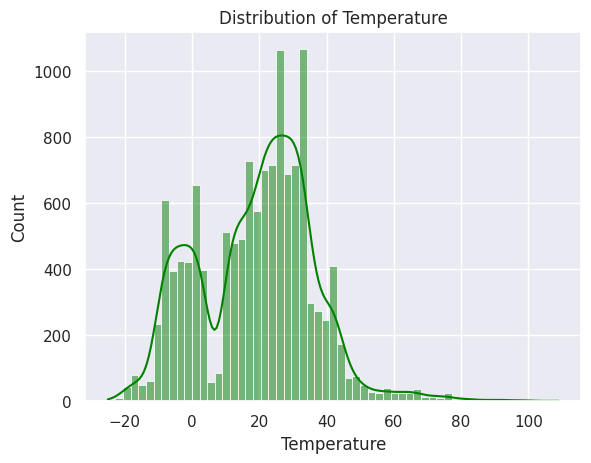

In [16]:
sns.set_theme(style="darkgrid")
sns.histplot(data['Temperature'],color="Green",kde= True)
plt.title("Distribution of Temperature")
plt.show()

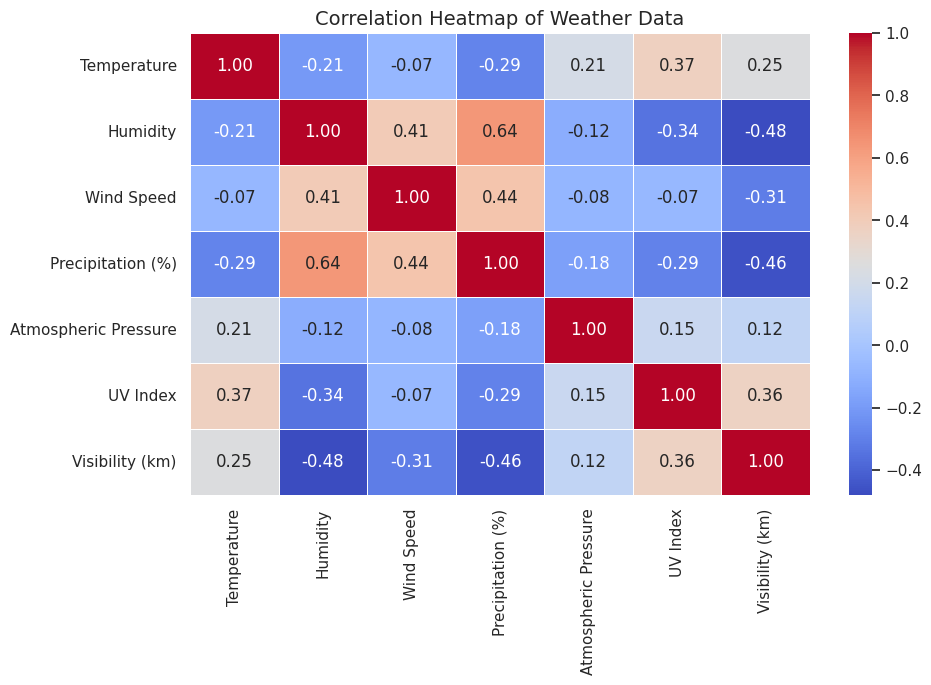

In [17]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Weather Data", fontsize=14)
plt.show()


In [18]:
# scaling
from sklearn.preprocessing import RobustScaler
rs= RobustScaler()


In [19]:
data.skew(numeric_only=True)

,0
Temperature,0.221741
Humidity,-0.401614
Wind Speed,1.360263
Precipitation (%),-0.152457
Atmospheric Pressure,-0.293899
UV Index,0.900010
Visibility (km),1.233275


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Weather Type"]=le.fit_transform(data["Weather Type"])
data["Location"]=le.fit_transform(data["Location"])

In [21]:
#train test split
from sklearn.model_selection import train_test_split

In [22]:
x=data.drop("Weather Type",axis=1)
y=data["Weather Type"]
y=le.fit_transform(y)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Apply one-hot encoding to categorical columns after splitting
x_train = pd.get_dummies(x_train, columns=['Cloud Cover', 'Season', 'Location'])
x_test = pd.get_dummies(x_test, columns=['Cloud Cover', 'Season', 'Location'])

In [24]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dtc=dt.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy", accuracy_score(y_test,y_pred_dtc))

accuracy 0.9075757575757576


In [25]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rfc=rf.predict(x_test)
from sklearn.metrics import accuracy_score
print("accuracy", accuracy_score(y_test,y_pred_rfc))

accuracy 0.9147727272727273


In [26]:
#XG Boost Tree classifier
from sklearn.ensemble import GradientBoostingClassifier
gbr=GradientBoostingClassifier()
gbr.fit(x_train,y_train)
y_pred_gbr=gbr.predict(x_test)

print("accuracy", accuracy_score(y_test,y_pred_gbr))

accuracy 0.9125


<Axes: >

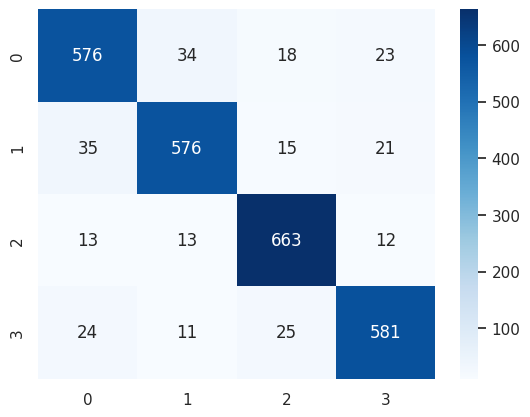

In [27]:
cm=confusion_matrix(y_test,y_pred_dtc)
sns.heatmap(cm ,annot=True, fmt="d",cmap="Blues")

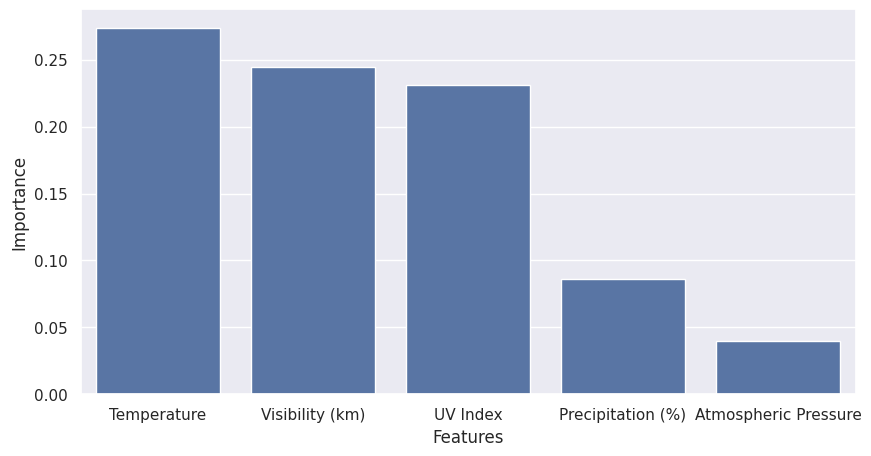

In [28]:
#most useful column
importances=dt.feature_importances_
features=x_train.columns
fea_imp= pd.DataFrame({"Features":features,"Importance":importances})
fea_imp=fea_imp.sort_values(by="Importance",ascending=False).head(5)
plt.figure(figsize=(10,5))
sns.barplot(data=fea_imp,x="Features",y="Importance")
plt.show()